In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# --- Load cleaned dataset ---
df = pd.read_csv("cleaned_flights_data.csv", parse_dates=["FL_DATE"])
df.head()

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,dep_time,...,Route,Distance_Bin,Cancelled_Carrier,Cancelled_Weather,Cancelled_NAS,Cancelled_Security,Flights_Per_Origin,Rolling7D_DepDelay,DELAY_CAUSE,DELAY_MINUTES
0,2019-01-09,United Air Lines Inc.,FLL,EWR,-4.0,-14.0,0.0,0.0,1065.0,11:51:00,...,FLL-EWR,Medium,0,0,0,0,35,-4.0,NO_DELAY,0
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,-6.0,-5.0,0.0,0.0,1399.0,21:14:00,...,MSP-SEA,Medium,0,0,0,0,36,-6.0,NO_DELAY,0
2,2022-07-22,United Air Lines Inc.,DEN,MSP,6.0,0.0,0.0,0.0,680.0,10:00:00,...,DEN-MSP,Medium,0,0,0,0,79,1.0,NO_DELAY,0
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,-1.0,24.0,0.0,0.0,1589.0,16:08:00,...,MSP-SFO,Long,0,0,0,0,40,-3.5,NAS,24
4,2020-02-23,Spirit Air Lines,MCO,DFW,-2.0,-1.0,0.0,0.0,985.0,18:38:00,...,MCO-DFW,Medium,0,0,0,0,46,-2.0,NO_DELAY,0


In [25]:
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,6)

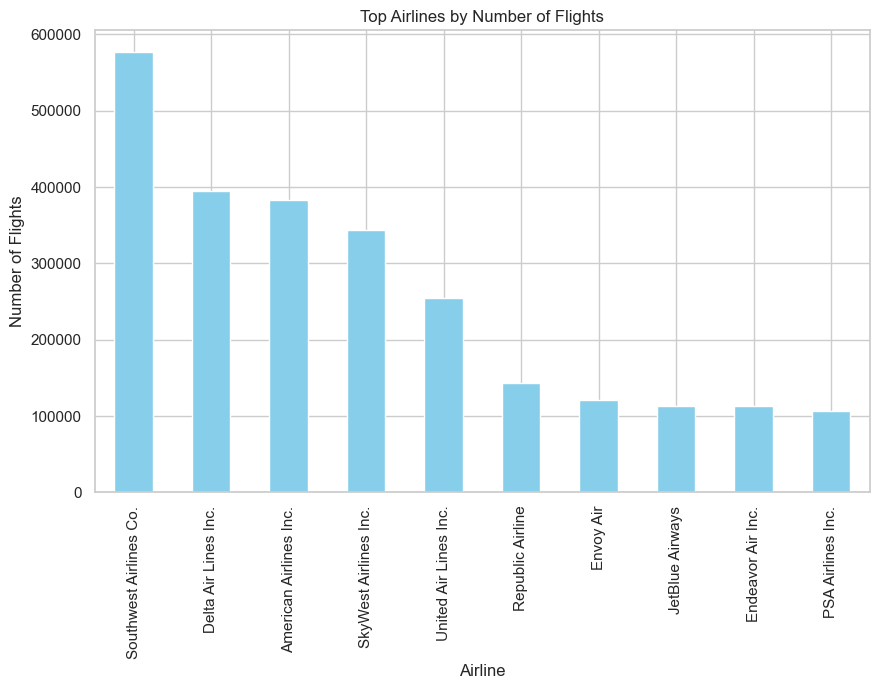

In [31]:
# 1. Top Airlines (by flight count)
plt.figure()
df['AIRLINE'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Airlines by Number of Flights")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.show()

In [40]:
# Extract and analyze available months from 2023 flight data
df_2023 = df[df['FL_DATE'].dt.year == 2023]

# Get unique months
unique_months_2023 = df_2023['FL_DATE'].dt.month.unique()

# Sort them
unique_months_2023.sort()

print("Months available in 2023:", unique_months_2023)
print("Number of months in dataset for 2023:", len(unique_months_2023))

Months available in 2023: [1 2 3 4 5 6 7 8]
Number of months in dataset for 2023: 8


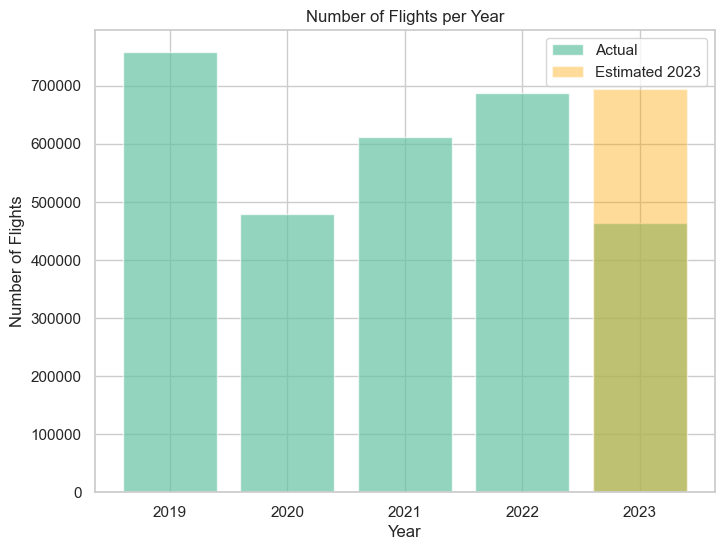

In [42]:
# Plot flights per year with actual values and estimated projection for 2023

# --- Flights per year (actual) ---
flights_per_year = df['FL_DATE'].dt.year.value_counts().sort_index()

# --- Actual 2023 flights (Jan–Aug only) ---
flights_2023_actual = flights_per_year.loc[2023]

# --- Estimate full 2023 (based on average per month) ---
df_2023 = df[df['FL_DATE'].dt.year == 2023]
avg_per_month_2023 = df_2023.shape[0] / df_2023['FL_DATE'].dt.month.nunique()
flights_2023_est = int(avg_per_month_2023 * 12)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.bar(flights_per_year.index, flights_per_year.values, alpha=0.7, label="Actual")

# Add estimated bar for 2023
plt.bar(2023, flights_2023_est, alpha=0.4, color="orange", label="Estimated 2023")

plt.title("Number of Flights per Year")
plt.xlabel("Year")
plt.ylabel("Number of Flights")
plt.legend()
plt.show()


## Insights: Number of Flights per Year

- **2019**: Peak at ~750K flights (pre-COVID baseline).  
- **2020**: Sharp drop (~470K) due to pandemic.  
- **2021–2022**: Steady recovery (~610K → ~690K).  
- **2023**: Partial data shows ~460K, projected ~740K → near/full recovery to pre-COVID levels.  


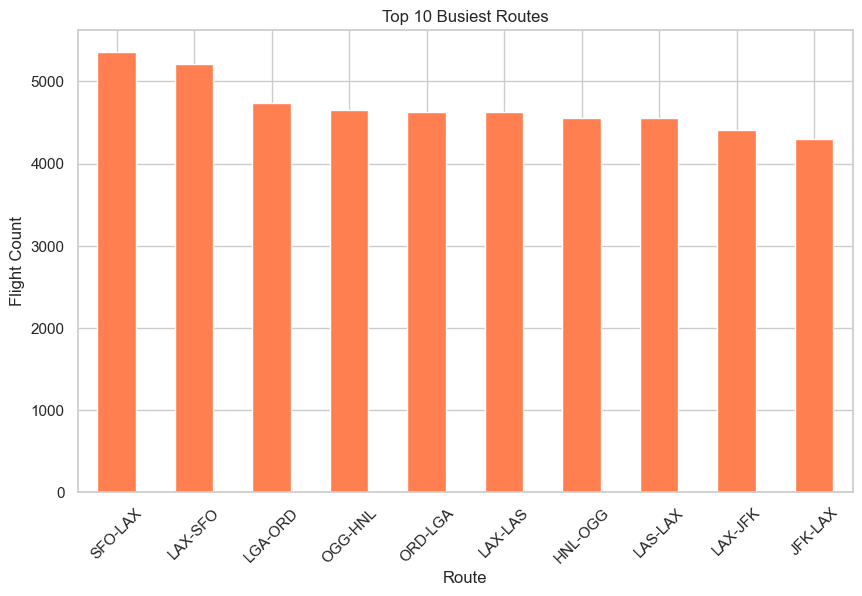

In [47]:
# 3. Top Routes (by frequency)
plt.figure()
df['Route'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Busiest Routes")
plt.xlabel("Route")
plt.ylabel("Flight Count")
plt.xticks(rotation=45)
plt.show()

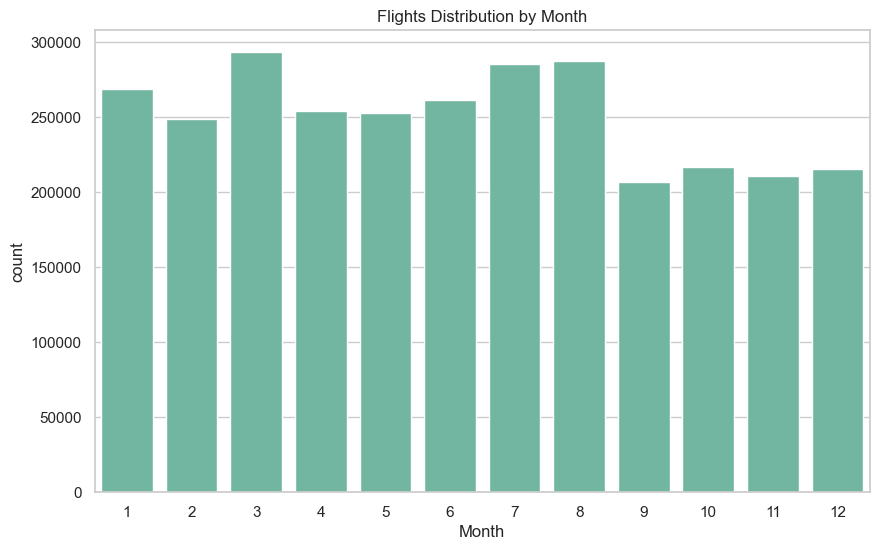

In [49]:
# 4. Busiest Months (Flights per Month)
plt.figure()
sns.countplot(x='Month', data=df, order=sorted(df['Month'].unique()))
plt.title("Flights Distribution by Month")
plt.show()

In [51]:
# Shift values so 0=Sunday becomes 7
df['DayOfWeek'] = df['DayOfWeek'].replace({0:7})


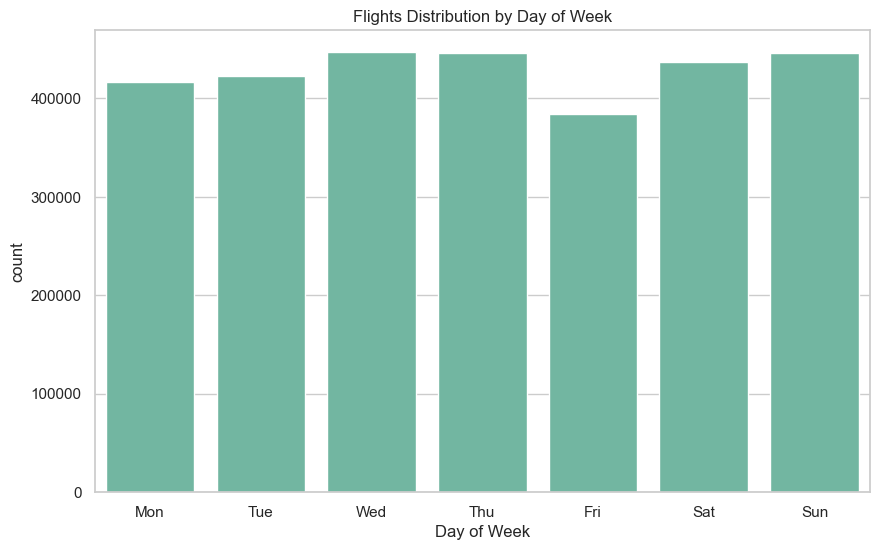

In [53]:
#5 Number of flights in a week
day_map = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}
df['DayOfWeekName'] = df['DayOfWeek'].map(day_map)

plt.figure()
sns.countplot(x='DayOfWeekName', data=df, 
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Flights Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.show()

In [55]:
df['dep_hour'] = pd.to_datetime(df['dep_time'], format='%H:%M:%S', errors='coerce').dt.hour
df['arr_hour'] = pd.to_datetime(df['arr_time'], format='%H:%M:%S', errors='coerce').dt.hour

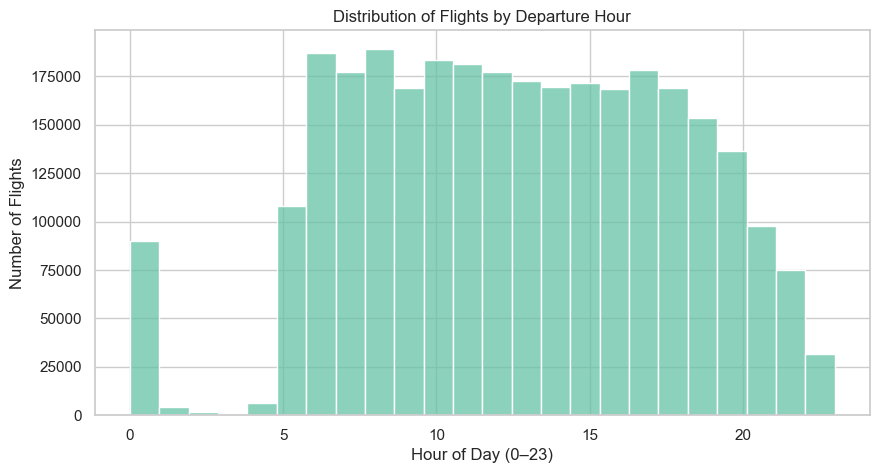

In [57]:
# 6 Distribution of Flights by Departure Hour
plt.figure(figsize=(10,5))
sns.histplot(df['dep_hour'], bins=24, kde=False)
plt.title("Distribution of Flights by Departure Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Flights")
plt.show()



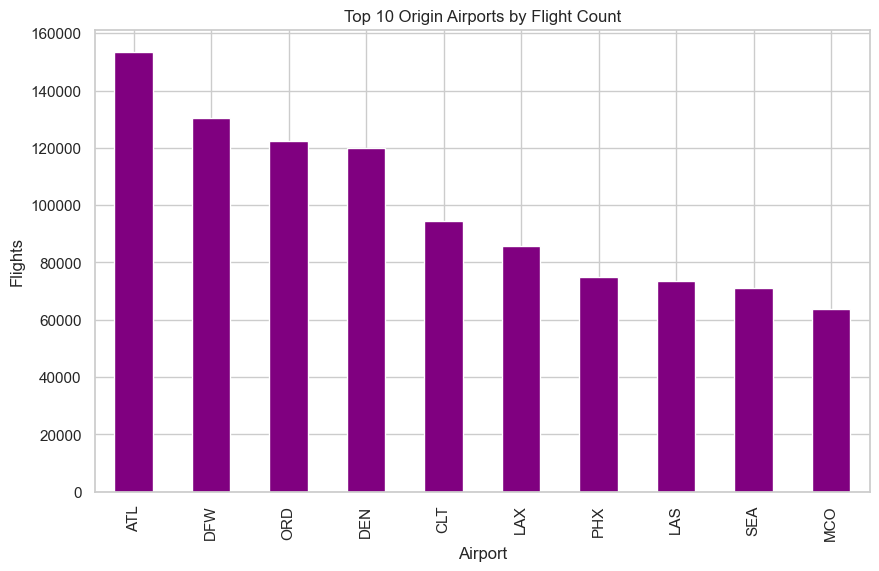

In [59]:
# 7. Flight Distribution by Airport (Top 10 Origins)
plt.figure()
df['ORIGIN'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Origin Airports by Flight Count")
plt.xlabel("Airport")
plt.ylabel("Flights")
plt.show()

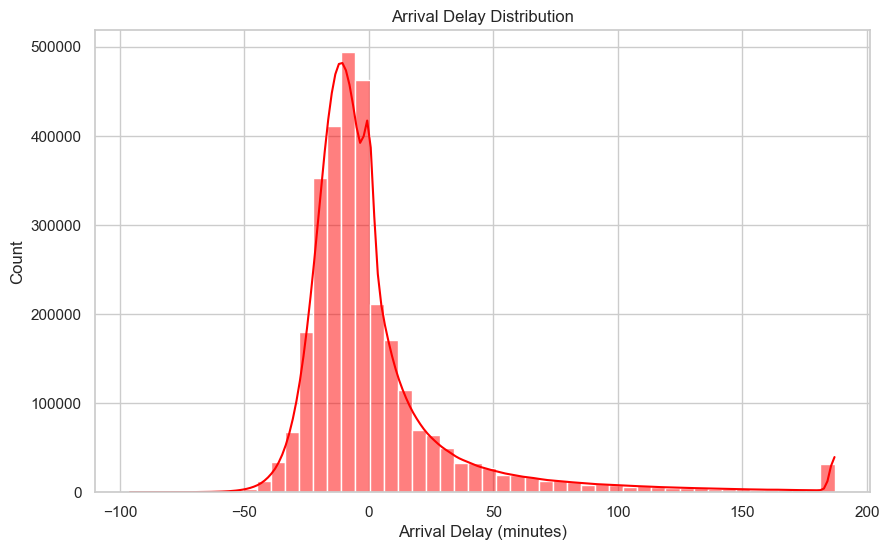

In [61]:
# 8. Delay Distribution (Arrival Delay)
plt.figure()
sns.histplot(df['ARR_DELAY'], bins=50, kde=True, color="red")
plt.title("Arrival Delay Distribution")
plt.xlabel("Arrival Delay (minutes)")
plt.show()


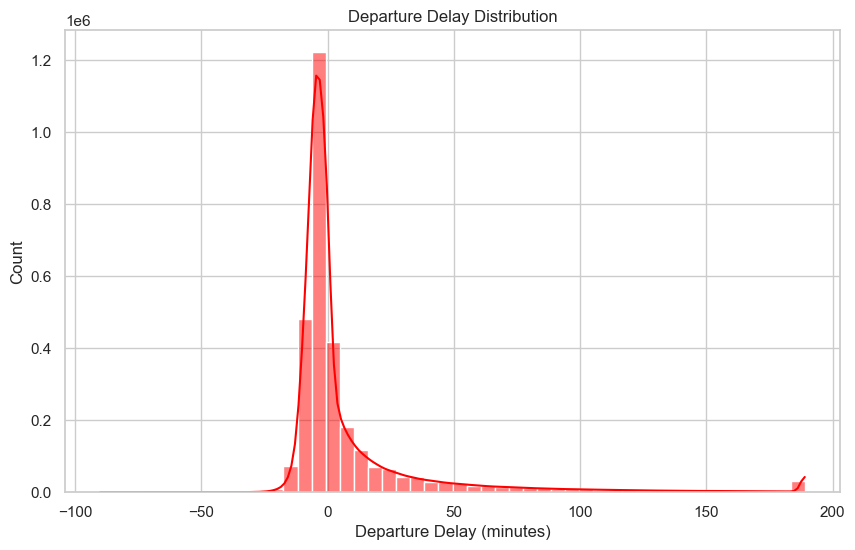

In [63]:
# 9. Delay Distribution (Departure Delay)
plt.figure()
sns.histplot(df['DEP_DELAY'], bins=50, kde=True, color="red")
plt.title("Departure Delay Distribution")
plt.xlabel("Departure Delay (minutes)")
plt.show()


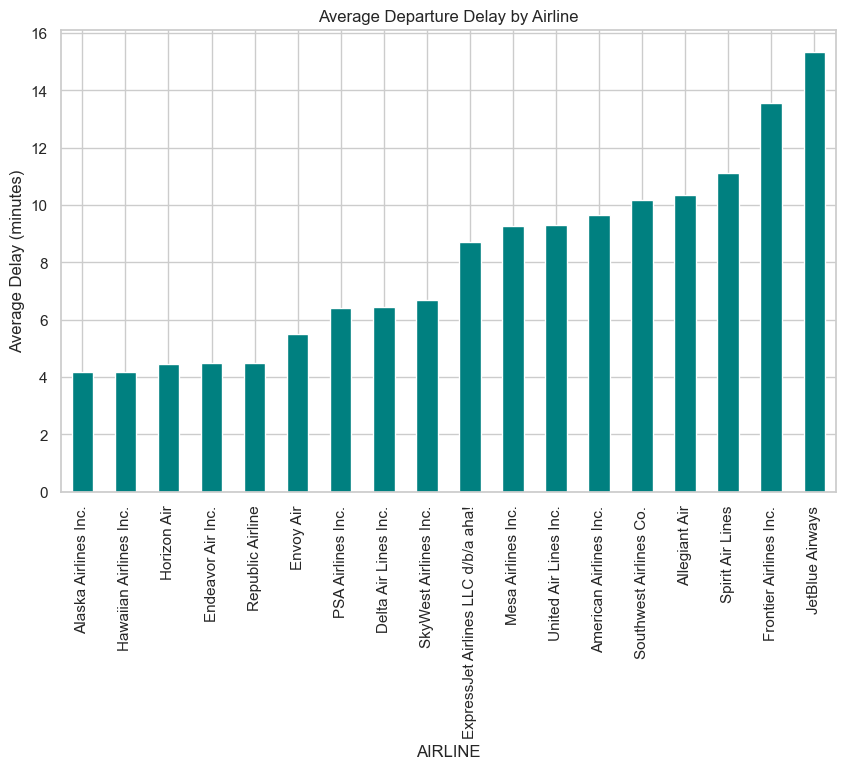

In [65]:
#10 Average Departure Delay by Airline
plt.figure()
df.groupby("AIRLINE")['DEP_DELAY'].mean().sort_values().plot(kind='bar', color='teal')
plt.title("Average Departure Delay by Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()

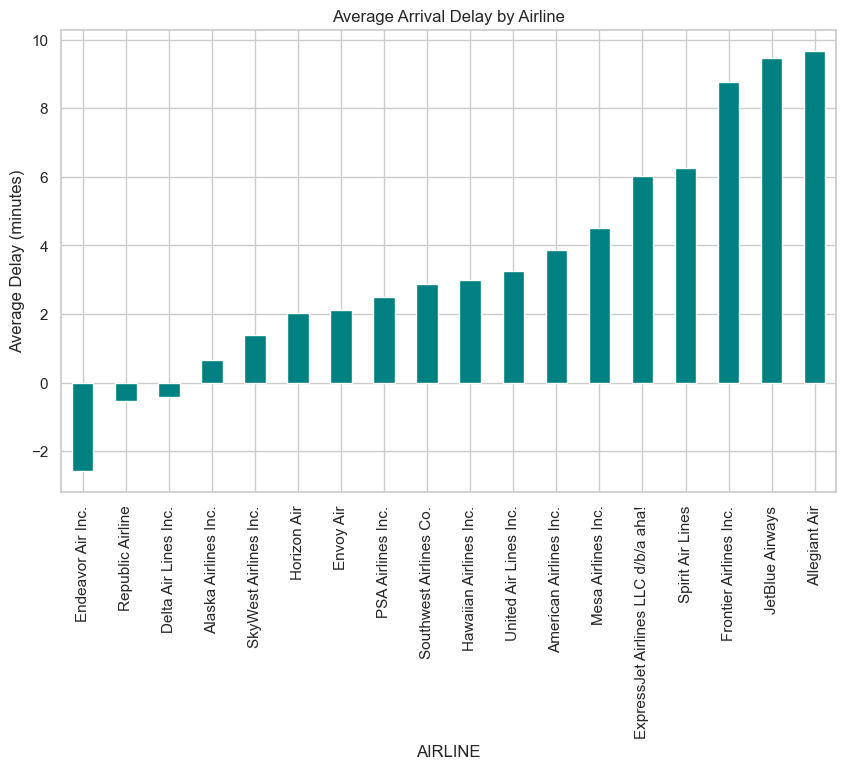

In [67]:
#11 Average Arrival Delay by Airline
plt.figure()
df.groupby("AIRLINE")['ARR_DELAY'].mean().sort_values().plot(kind='bar', color='teal')
plt.title("Average Arrival Delay by Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()

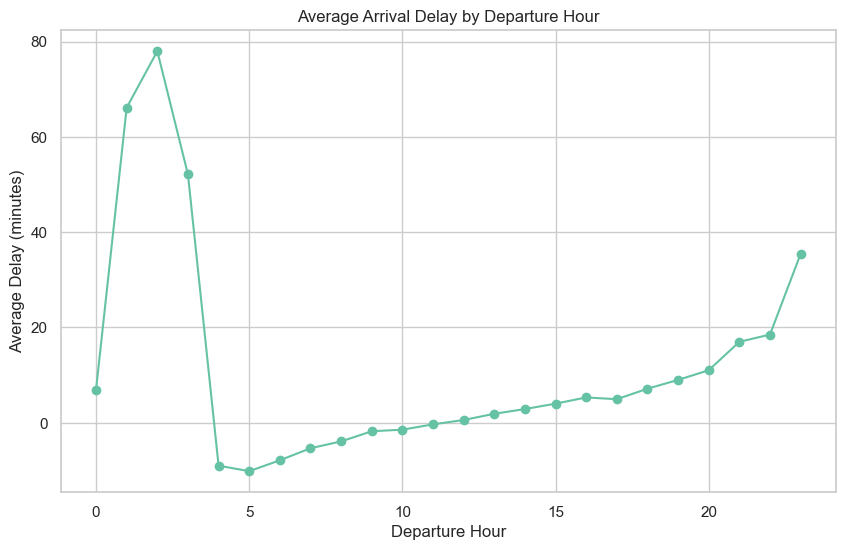

In [69]:
# 12. Average Arrival Delay by Time of Day (Departure Hour)
plt.figure()
df.groupby("dep_hour")['ARR_DELAY'].mean().plot(kind='line', marker='o')
plt.title("Average Arrival Delay by Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Average Delay (minutes)")
plt.show()

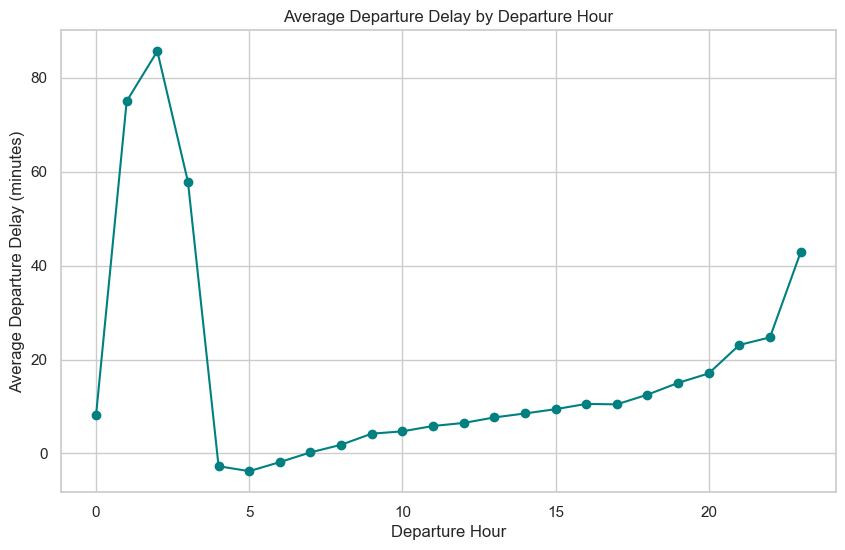

In [71]:
# 13. Average Departure Delay by Time of Day (Departure Hour)
plt.figure()
df.groupby("dep_hour")['DEP_DELAY'].mean().plot(kind='line', marker='o', color='teal')
plt.title("Average Departure Delay by Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Average Departure Delay (minutes)")
plt.show()


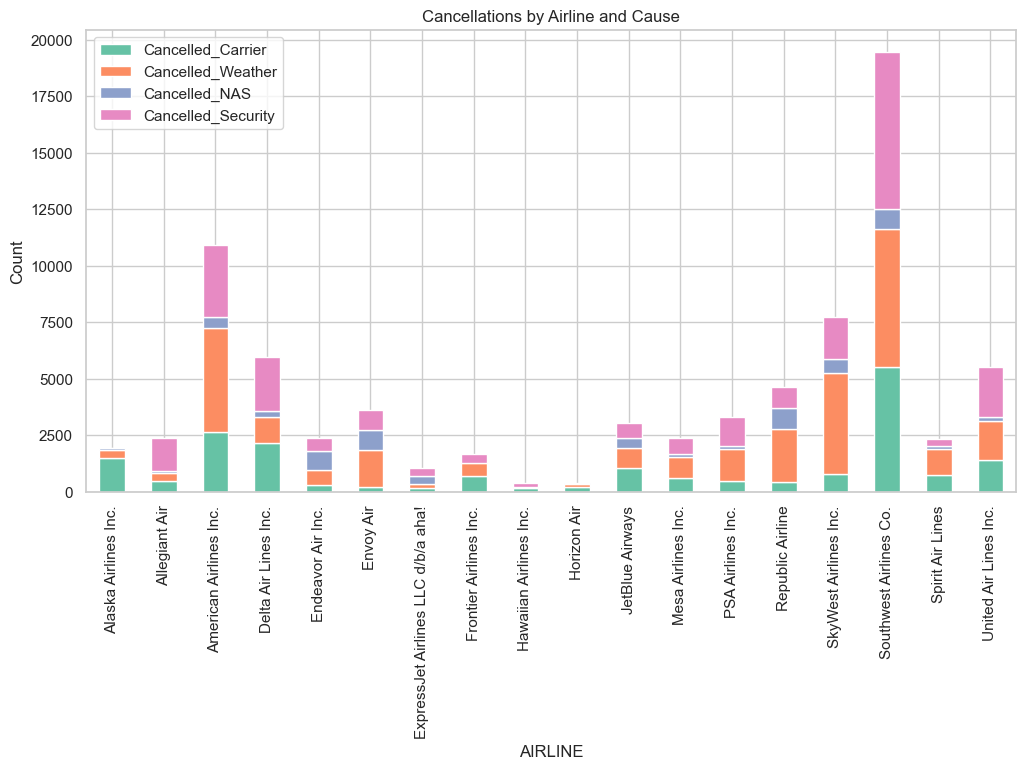

In [73]:
# 14. Delay Causes by Airline (Carrier, Weather, NAS, Security)
delay_causes = df.groupby("AIRLINE")[['Cancelled_Carrier','Cancelled_Weather','Cancelled_NAS','Cancelled_Security']].sum()
delay_causes.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Cancellations by Airline and Cause")
plt.ylabel("Count")
plt.show()

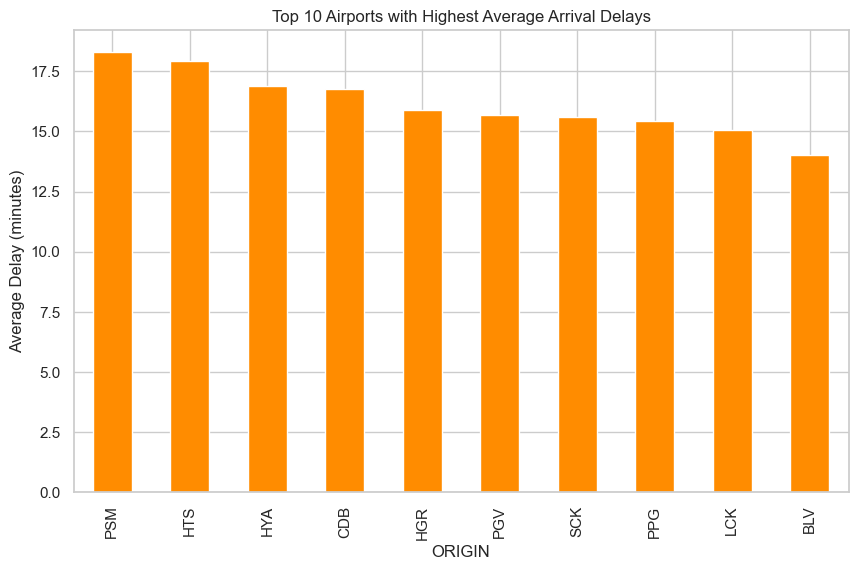

In [75]:
# 15. Average Arrival Delay by Airport (Top 10 Origins)
plt.figure()
df.groupby("ORIGIN")['ARR_DELAY'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='darkorange')
plt.title("Top 10 Airports with Highest Average Arrival Delays")
plt.ylabel("Average Delay (minutes)")
plt.show()

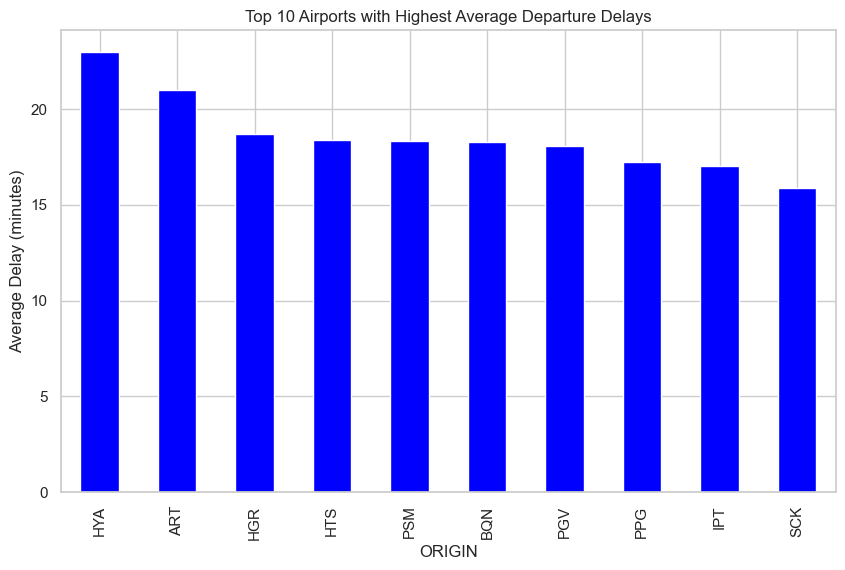

In [77]:
# 16. Average Departure Delay by Airport (Top 10 Origins)
plt.figure()
df.groupby("ORIGIN")['DEP_DELAY'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
plt.title("Top 10 Airports with Highest Average Departure Delays")
plt.ylabel("Average Delay (minutes)")
plt.show()

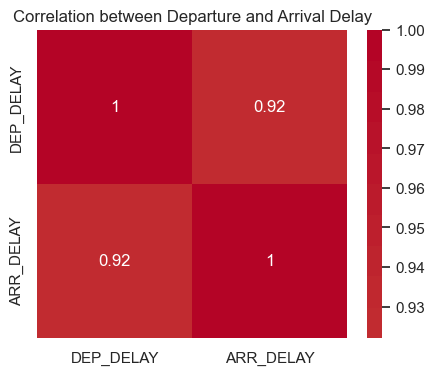

In [79]:
#17 correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df[['DEP_DELAY','ARR_DELAY']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Departure and Arrival Delay")
plt.show()


### Correlation between Departure Delay and Arrival Delay

- **Correlation = 0.92** → very strong positive relationship between departure and arrival delays.  
- **Meaning**: Flights that depart late almost always arrive late too.  
- **Not perfect (not 1.0)** → some flights recover time in the air, others lose more due to congestion.  
- **Insight**: Improving **departure punctuality** directly improves **on-time arrivals**.


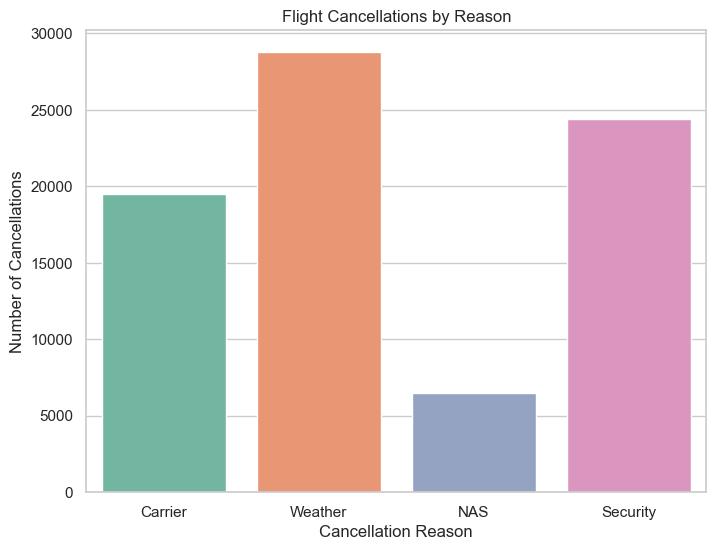

In [81]:
#18--Flight cancellations by Reason--

# --- Sum cancellations by each reason ---
cancel_summary = {
    "Carrier": df["Cancelled_Carrier"].sum(),
    "Weather": df["Cancelled_Weather"].sum(),
    "NAS": df["Cancelled_NAS"].sum(),
    "Security": df["Cancelled_Security"].sum()
}

# Convert to DataFrame for plotting
cancel_df = pd.DataFrame(list(cancel_summary.items()), columns=["Reason", "Count"])

# --- Bar Plot ---
plt.figure(figsize=(8,6))
sns.barplot(x="Reason", y="Count", data=cancel_df, palette="Set2")

plt.title("Flight Cancellations by Reason")
plt.xlabel("Cancellation Reason")
plt.ylabel("Number of Cancellations")
plt.show()



### Flight Cancellations by Reason (2019–2023)

- **Weather** is the **highest cause** of cancellations → flights are most affected by storms, fog, and extreme conditions.  
- **Security** is the **second highest cause** → unusual spike during **2020 (COVID-19 period)** due to travel bans and heightened airport checks.  
- **Carrier-related issues** are the **third highest cause** → cancellations due to airline operational or technical problems.  
- **NAS (Air Traffic System)** is the **least cause** → very few cancellations due to air traffic control restrictions.  

**Key Insight:**  
> **Weather and Security (external factors) dominate cancellations**, while **Carrier and NAS (airline/operational factors)** contribute relatively less.


In [84]:
# Filter for security cancellations
security_cancellations = df[df['Cancelled_Security'] == 1]

# Extract year
security_cancellations['Year'] = security_cancellations['FL_DATE'].dt.year

# Count cancellations per year
security_by_year = security_cancellations.groupby('Year')['Cancelled_Security'].sum()

print(security_by_year)

Year
2020    24221
2021       68
2022      101
2023       27
Name: Cancelled_Security, dtype: int64


### Security Cancellations (2019–2023)

**2020** saw a huge spike (**24,221**) due to **_COVID-19 restrictions and heightened airport protocols_**.  
Numbers dropped sharply in **2021–2023** (**68, 101, 27**), returning to minimal levels.  

> **_COVID-19_** was the main driver of unusually high security cancellations, with normal patterns resuming afterward.


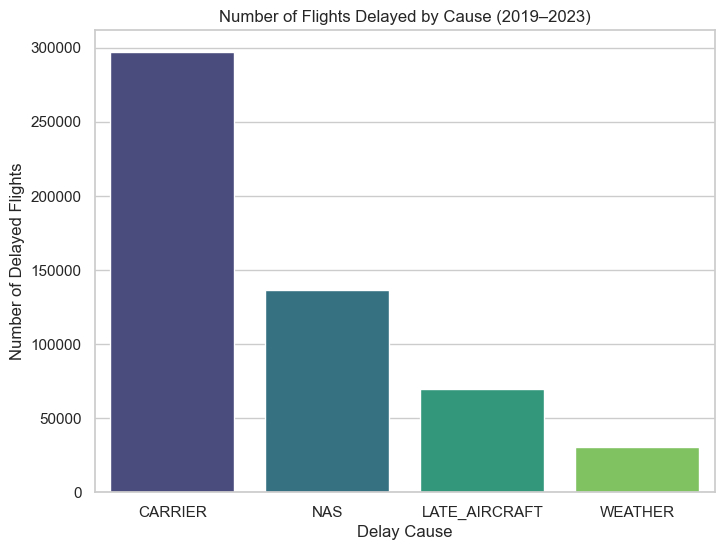

In [116]:
#19 ---Flights Delayed by Cause---

delayed_df = df[df['DELAY_MINUTES'] > 0]

# Count number of delayed flights by cause
flights_delayed_by_cause = delayed_df['DELAY_CAUSE'].value_counts()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=flights_delayed_by_cause.index, y=flights_delayed_by_cause.values, palette="viridis")
plt.title("Number of Flights Delayed by Cause (2019–2023)")
plt.xlabel("Delay Cause")
plt.ylabel("Number of Delayed Flights")
plt.show()


- **Carrier delays** affect the most flights, indicating operational issues like crew or mechanical problems have the largest impact.  
- **NAS (National Airspace System) delays** are the second most frequent, reflecting airspace congestion or air traffic control delays.  
- **Late Aircraft delays** follow, showing the effect of delayed arrivals on subsequent flights.  
- **Weather delays** are the least frequent, suggesting minimal disruption from weather during this period.  

**Insight:** Reducing carrier and NAS-related issues could significantly decrease the number of delayed flights.
